### categorical encoding
As we have discussed earlier we have to encode categorical data into number as (most) our machine learning algorithms don’t understand string values. Let’s discuss categorical features in more detail. Categorical features are divided as follow: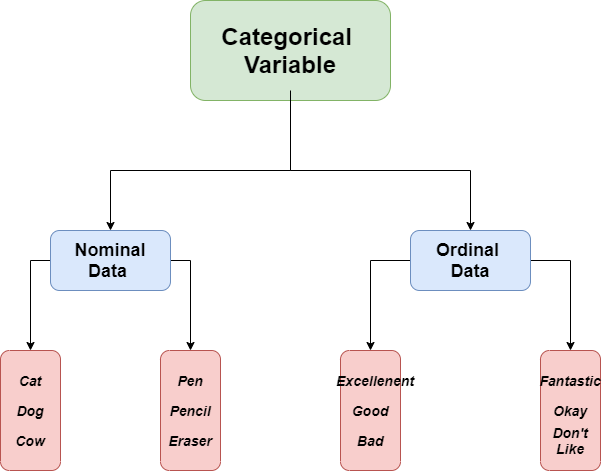

So the categorical features we give input to machine learning algorithm could be one of the above:

1. **Nominal Data**: The type of data which are independent to each other(i.e - Don’t have specific order).

2. __Ordinal Data__: The type of data which are dependent on one another(i.e - Have specific order).

Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values, because Machine Learning algorihtms are nothing but a mathematical equation and it requires numbers to work on not some string values. Many algorithm’s performances vary based on how Categorical features are encoded. There are vaious encoding techniques

Label Encoding.

One Hot Encoding.

Ordinal Encoding.

Mean Encoding or Target Encoding.

For explanation let’s create a dataframe, which has two independent variables or features (Color, Level) and one label (Target).



In [5]:
import pandas as pd
df = pd.DataFrame({'Color':['Yellow','Green','Red','Green'],
                  'Level':['Medium','Easy','Difficult','Easy'],
                    'Target':[0,1,1,0]})
df

,Color,Level,Target
0,Yellow,Medium,0
1,Green,Easy,1
2,Red,Difficult,1
3,Green,Easy,0


Here in the dataset you can seee we have categorical features and we will encode them using different encoding techniques, one by one.

### ***Label Encoder***

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Color_encoded_0'] = le.fit_transform(df.Color)
df

,Color,Level,Target,Color_encoded_0
0,Yellow,Medium,0,2
1,Green,Easy,1,0
2,Red,Difficult,1,1
3,Green,Easy,0,0


In this encoding, each category is assigned a value from 0 through N (here N is the number of categories for the feature). One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship.

In above example it may look like ***Green < Red < Yellow*** are in sequence (as __0 < 1 < 2__ are in sequence) which is not true.

### ***One Hot Encoder***
In this method, we map each category to a row that contains 1 and 0 denoting the presence or absence of the feature. The number of rows depends on the number of categories for features. This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature.

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
d1=pd.DataFrame(ohe.fit_transform(df['Color'].values.reshape(-1,1)).toarray(),columns =['Color_Green','Color_Red','Color_Yellow'])

pd.concat([df,d1],axis = 1)

,Color,Level,Target,Color_encoded_0,Color_Green,Color_Red,Color_Yellow
0,Yellow,Medium,0,2,0.0,0.0,1.0
1,Green,Easy,1,0,1.0,0.0,0.0
2,Red,Difficult,1,1,0.0,1.0,0.0
3,Green,Easy,0,0,1.0,0.0,0.0


One Hot Encoder does not consider any relation between classes unlike Label Encoder. This is the main difference between label and one hot encoder.

Same thing can be done by pd.get_dummies()

In [52]:
pd.get_dummies(df,prefix ='Color',columns = ['Color'])

,Level,Target,Color_encoded_0,Color_Green,Color_Red,Color_Yellow
0,Medium,0,2,False,False,True
1,Easy,1,0,True,False,False
2,Difficult,1,1,False,True,False
3,Easy,0,0,True,False,False


### ***Ordinal Encoding***
Ordinal Encoding ensures that ordinal features keeps the order as it is. It looks like label encoder but label encoder would not consider the feature is ordinal or nominal it assign it with sequence of integer.

Ordinal encoding will assign values as ***(Easy(1) < Medium(2) < Difficult(3)***). Usually, Ordinal Encoding starts from 1. Refer to this code using Pandas, where first, we need to assign the original order of the variable through a dictionary. Then we can map each row for the variable as per the dictionary.

In [56]:
Level_Dict = {'Easy':1,
             'Medium':2,
             'Difficult':3}
df['Level_ord'] = df.Level.map(Level_Dict)
df

,Color,Level,Target,Color_encoded_0,Level_ord
0,Yellow,Medium,0,2,2
1,Green,Easy,1,0,1
2,Red,Difficult,1,1,3
3,Green,Easy,0,0,1


### ***Mean Encoding***


Mean Encoding or Target Encoding is one viral encoding approach followed by Kagglers. Mean encoding is similar to label encoding, except here labels are correlated directly with the target.

Mean encoding approach is as below:

1. Select a categorical variable you would like to transform

2. Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Level’)

3. Group by the categorical variable and obtain aggregated count over “Target” variable

4. Divide the __step 2 / step 3__ results and join it back with the train.

In [63]:
mean_encode = df.groupby(['Level'])['Target'].mean()
df['Level_mean_enc'] = df['Level'].map(mean_encode)
df

,Color,Level,Target,Color_encoded_0,Level_ord,Level_mean_enc
0,Yellow,Medium,0,2,2,0.0
1,Green,Easy,1,0,1,0.5
2,Red,Difficult,1,1,3,1.0
3,Green,Easy,0,0,1,0.5
